In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train = pd.read_csv('train_data.csv')
val = pd.read_csv('validation_data.csv')
test = pd.read_csv('test_data.csv')

x_train = train.drop('Churn_Yes', axis=1)
y_train = train['Churn_Yes']

x_val = val.drop('Churn_Yes', axis=1)
y_val = val['Churn_Yes']

x_test = test.drop('Churn_Yes', axis=1)
y_test = test['Churn_Yes']

In [10]:
from xgboost import XGBClassifier
base_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
base_model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:12:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [11]:
val_pred = base_model.predict(x_val)

val_accuracy = accuracy_score(y_val, val_pred)
precision = precision_score(y_val, val_pred)
recall = recall_score(y_val, val_pred)
f1 = f1_score(y_val, val_pred)


print("Model Evaluation Metrics: XGBoost Validation data")
print(f"Accuracy:  {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Evaluation Metrics: XGBoost Validation data
Accuracy:  0.9384
Precision: 0.9030
Recall   : 0.8570
F1 Score : 0.8794


In [12]:
test_pred = base_model.predict(x_test)

test_accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)


print("Model Evaluation Metrics:  XGBoost for test data")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Evaluation Metrics:  XGBoost for test data
Accuracy:  0.8183
Precision: 0.6787
Recall   : 0.6142
F1 Score : 0.6448


Tuning the model

In [29]:
from xgboost import XGBClassifier
tune_model1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators = 300, 
                            learning_rate = 0.01, max_depth = 7, min_child_weight = 5)
tune_model1.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:18:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [30]:
val_pred = tune_model1.predict(x_val)

val_accuracy = accuracy_score(y_val, val_pred)
precision = precision_score(y_val, val_pred)
recall = recall_score(y_val, val_pred)
f1 = f1_score(y_val, val_pred)


print("Model Evaluation Metrics: XGBoost Validation data")
print(f"Accuracy:  {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Evaluation Metrics: XGBoost Validation data
Accuracy:  0.8307
Precision: 0.7437
Recall   : 0.5406
F1 Score : 0.6261


In [31]:
test_pred = tune_model1.predict(x_test)

test_accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)


print("Model Evaluation Metrics:  XGBoost for test data")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Evaluation Metrics:  XGBoost for test data
Accuracy:  0.8115
Precision: 0.6969
Recall   : 0.5275
F1 Score : 0.6005


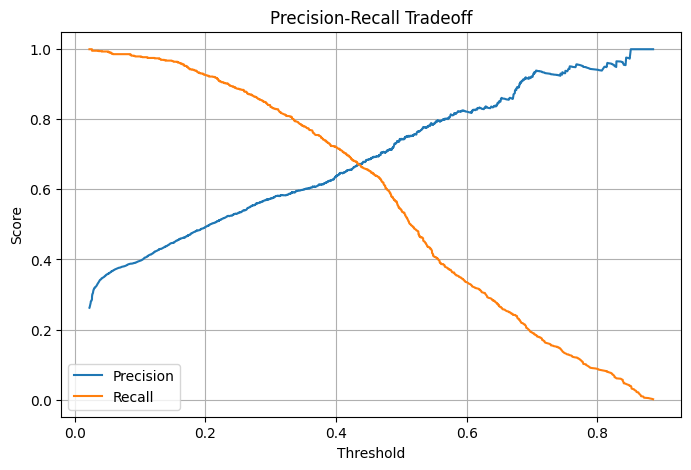

In [38]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_probs = tune_model1.predict_proba(x_val)[:, 1]
prec, rec, thresh = precision_recall_curve(y_val, y_probs)

plt.figure(figsize=(8,5))
plt.plot(thresh, prec[:-1], label='Precision')
plt.plot(thresh, rec[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
tune_model2 = XGBClassifier( use_label_encoder=False, n_estimators= 300, learning_rate= 0.03,
    max_depth= 3, min_child_weight= 1,gamma= 0,
    subsample= 0.8,colsample_bytree= 0.6,reg_alpha= 0,
    reg_lambda= 0.5,scale_pos_weight=2.77,random_state= 42,eval_metric='logloss' )
tune_model2.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [48]:
val_pred = tune_model2.predict(x_val)

val_accuracy = accuracy_score(y_val, val_pred)
precision = precision_score(y_val, val_pred)
recall = recall_score(y_val, val_pred)
f1 = f1_score(y_val, val_pred)


print("Model Evaluation Metrics: XGBoost Validation data")
print(f"Accuracy:  {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Evaluation Metrics: XGBoost Validation data
Accuracy:  0.7575
Precision: 0.5232
Recall   : 0.8418
F1 Score : 0.6453


In [49]:
test_pred = tune_model2.predict(x_test)

test_accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)


print("Model Evaluation Metrics:  XGBoost for test data")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Evaluation Metrics:  XGBoost for test data
Accuracy:  0.7524
Precision: 0.5239
Recall   : 0.8573
F1 Score : 0.6504


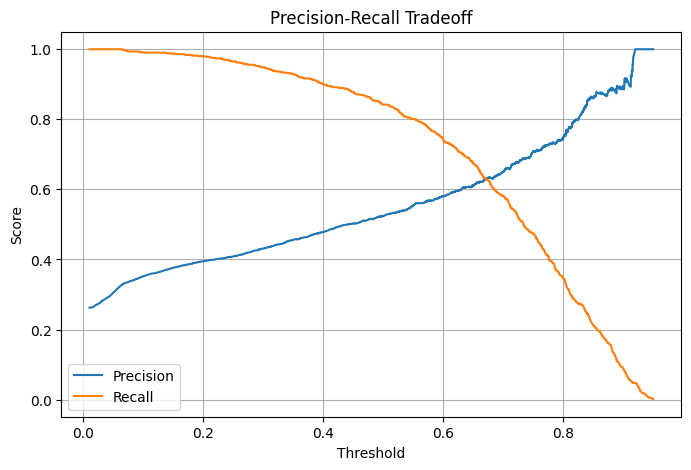

In [50]:
y_probs = tune_model2.predict_proba(x_val)[:, 1]
prec, rec, thresh = precision_recall_curve(y_val, y_probs)

plt.figure(figsize=(8,5))
plt.plot(thresh, prec[:-1], label='Precision')
plt.plot(thresh, rec[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

Work area

In [51]:
from xgboost import XGBClassifier

tune_model3 = XGBClassifier(
    use_label_encoder=False,
    n_estimators=400,
    learning_rate=0.025,
    max_depth=4,
    min_child_weight=3,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.2,
    reg_lambda=1.0,
    scale_pos_weight=2.7,
    random_state=42,
    eval_metric='logloss'
)

tune_model3.fit(x_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [52]:
val_pred = tune_model3.predict(x_val)

val_accuracy = accuracy_score(y_val, val_pred)
precision = precision_score(y_val, val_pred)
recall = recall_score(y_val, val_pred)
f1 = f1_score(y_val, val_pred)


print("Model Evaluation Metrics: XGBoost Validation data")
print(f"Accuracy:  {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Evaluation Metrics: XGBoost Validation data
Accuracy:  0.7827
Precision: 0.5554
Recall   : 0.8581
F1 Score : 0.6743


In [53]:
test_pred = tune_model3.predict(x_test)

test_accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)


print("Model Evaluation Metrics:  XGBoost for test data")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Evaluation Metrics:  XGBoost for test data
Accuracy:  0.7609
Precision: 0.5353
Recall   : 0.8340
F1 Score : 0.6521


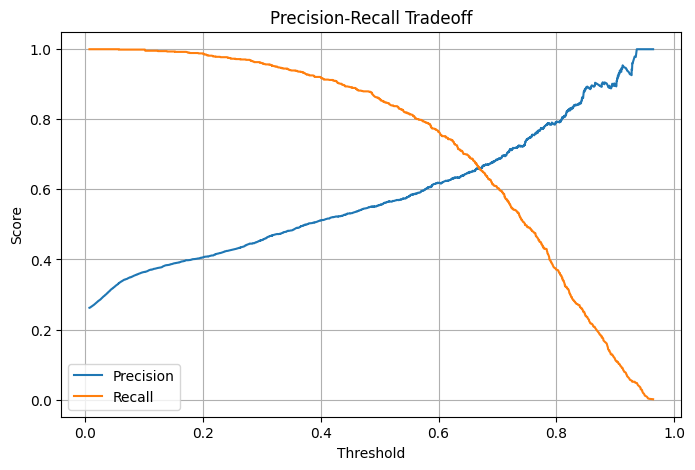

In [54]:
y_probs = tune_model3.predict_proba(x_val)[:, 1]
prec, rec, thresh = precision_recall_curve(y_val, y_probs)

plt.figure(figsize=(8,5))
plt.plot(thresh, prec[:-1], label='Precision')
plt.plot(thresh, rec[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

Now I will add the data of all the models in the dataframe

In [55]:
xgboost = pd.read_csv('xgboost_model_comparison.csv')
xgboost

,Model Number,Accuracy score Validation,Accuracy score Test,Precision Score Validation,Precision Score Test,Recall Validation,Recall Test,F1 Score Validation,F1 Score Test
0,Base Model,0.9384,0.8183,0.9030,0.6787,0.8570,0.6142,0.8794,0.6448
1,Model 1,0.8307,0.8115,0.7437,0.6969,0.5406,0.5275,0.6261,0.6005
2,Model 2,0.7575,0.7524,0.5232,0.5239,0.8418,0.8573,0.6453,0.6504
3,Model 3,0.7827,0.7609,0.5554,0.5353,0.8581,0.8340,0.6743,0.6521


Now refer Data Visualization file for the conclusion